# Analiza podstrani(subredditov) r/news in r/worldnews spletne strani Reddit

Reddit je ameriška zabavna, družbena in novičarska spletna stran.
Na Reddit uporabniki objavljajo razne povezave (večinoma na druge spletne strani), ki jih lahko drugi uporabniki ocenijo pozitivno (upvote) ali negativno (downvote) in komentirajo. Razdeljena je na več podstrani-subredditov.

Podstrani r/news in r/worldnews sta privzeti. Objave privzetih strani se pokažejo neregistriranim in novim uporabnikom na naslovnici(front page), ker se večina uporabnikov od podstrani ne odjavi, le prijavi, imajo tako privzete strani avtomatsko največ uporabnikov.

Primerjala sem novice dveh takih večjih podstrani r/news-novice in r/worldnews-svetovne novice. Podstrani so razdeljene na več delov, analizirala sem top-najboljše in contraversial-kontraverzno.

## Hipoteze
    - 1. r/news bo imel več ameriških virov novic kot r/worldnews.
    - 2. Viri r/worldnews bodo kvalitetnejše od virov r/news. (The Guardian > FoxNews ) 
    - 3. Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.
## Zanimivosti
    - Kateri viri so najbolje ocenjeni v posamezni kategoriji?
    - Kratek pregled 5 najbolje ocenjenih novic vsake kategorije
    - Kateri vir je najbolje ocenjen v r/news in r/worldnews skupaj
    - Kateri viri najbolj odstopajo (so izrazito bolje ocenjeni v posamezni kategoriji)
    - Primerjava povprečnih ocen in komentarjev najpogostejših virov, ki se pojavljajo v kategorijah kontraverzno in najboljse

In [1]:
import pandas as pd
%matplotlib inline
pd.set_option('max_colwidth',400)

In [2]:
news_con=pd.read_csv('news_con.csv')
news_top=pd.read_csv('news_top.csv')
wnews_con=pd.read_csv('wnews_con.csv')
wnews_top=pd.read_csv('wnews_top.csv')

In [3]:
news_con_viri=news_con.groupby(['Vir'],as_index=False)
news_top_viri=news_top.groupby(['Vir'],as_index=False)
wnews_con_viri=wnews_con.groupby(['Vir'],as_index=False)
wnews_top_viri=wnews_top.groupby(['Vir'],as_index=False)

### Hipoteza 1: r/news bo imel več ameriških virov novic kot r/worldnews
Že v samem opisu podstrani r/worldnews je zapisano, da stran dovoljuje povezave na vse novice, razen notranjih zadev in politike ZDA. Tako še s preštetjem pojavitve virov potrdimo, da hipoteza drži.

Združila sem skupaj število novic posameznega vira r/news in r/worldnews. Tako sem dobila vpogled v seznam najpogostejših virov na posamezni strani.

In [4]:
viri_news=pd.concat([news_con,news_top]).groupby(by='Vir',as_index=False).count()
viri_wnews=pd.concat([wnews_con,wnews_top]).groupby(by='Vir',as_index=False).count()

In [29]:
pogosti_news=viri_news[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10).set_index(['Vir'])
pogosti_news

,Naslov
Vir,
washingtonpost.com,58
theguardian.com,48
foxnews.com,25
nytimes.com,23
news.yahoo.com,22
nbcnews.com,21
abcnews.go.com,19
cnn.com,19
independent.co.uk,19


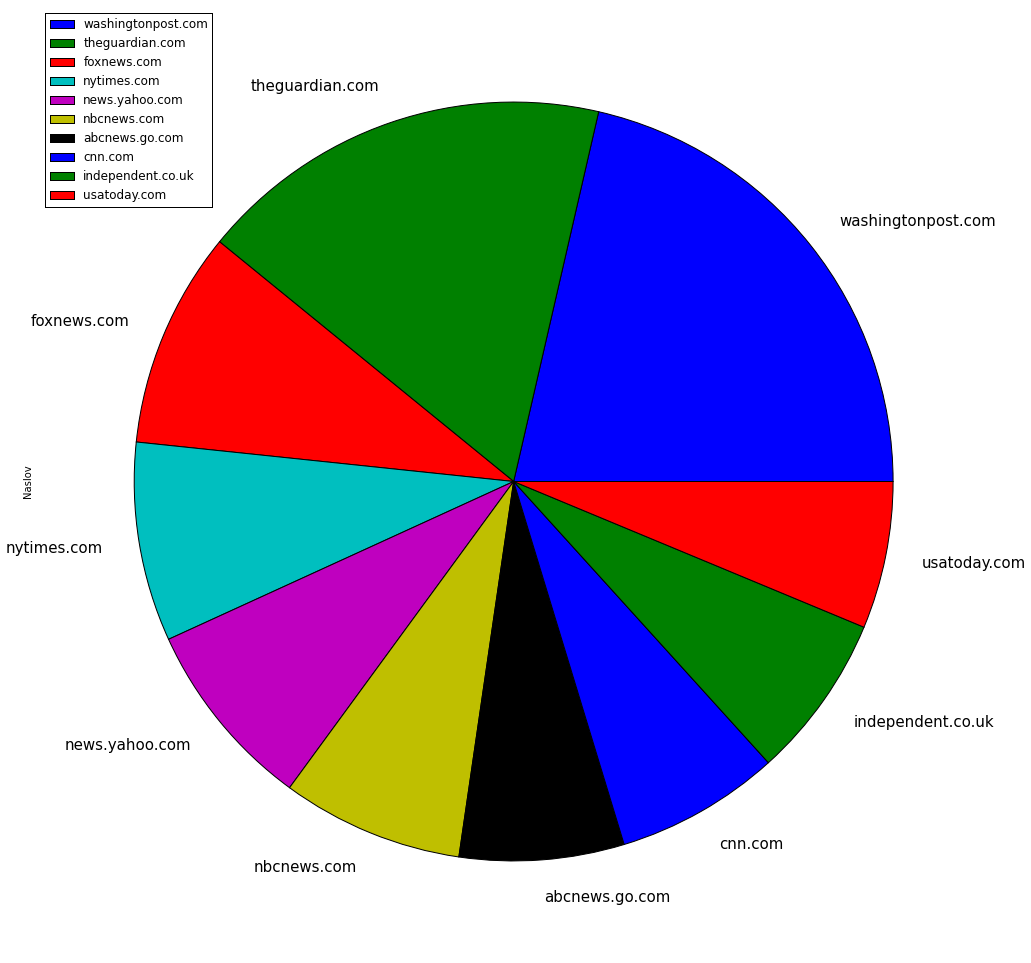

In [34]:
pogosti_news.plot(kind='pie',x='id',y='Naslov',figsize =(17,17),fontsize=15)

In [30]:
pogosti_wnews=viri_wnews[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10).set_index(['Vir'])
pogosti_wnews

,Naslov
Vir,
theguardian.com,64
rt.com,54
bbc.co.uk,36
dailymail.co.uk,31
independent.co.uk,30
bbc.com,29
nytimes.com,24
reuters.com,21
self.worldnews,16


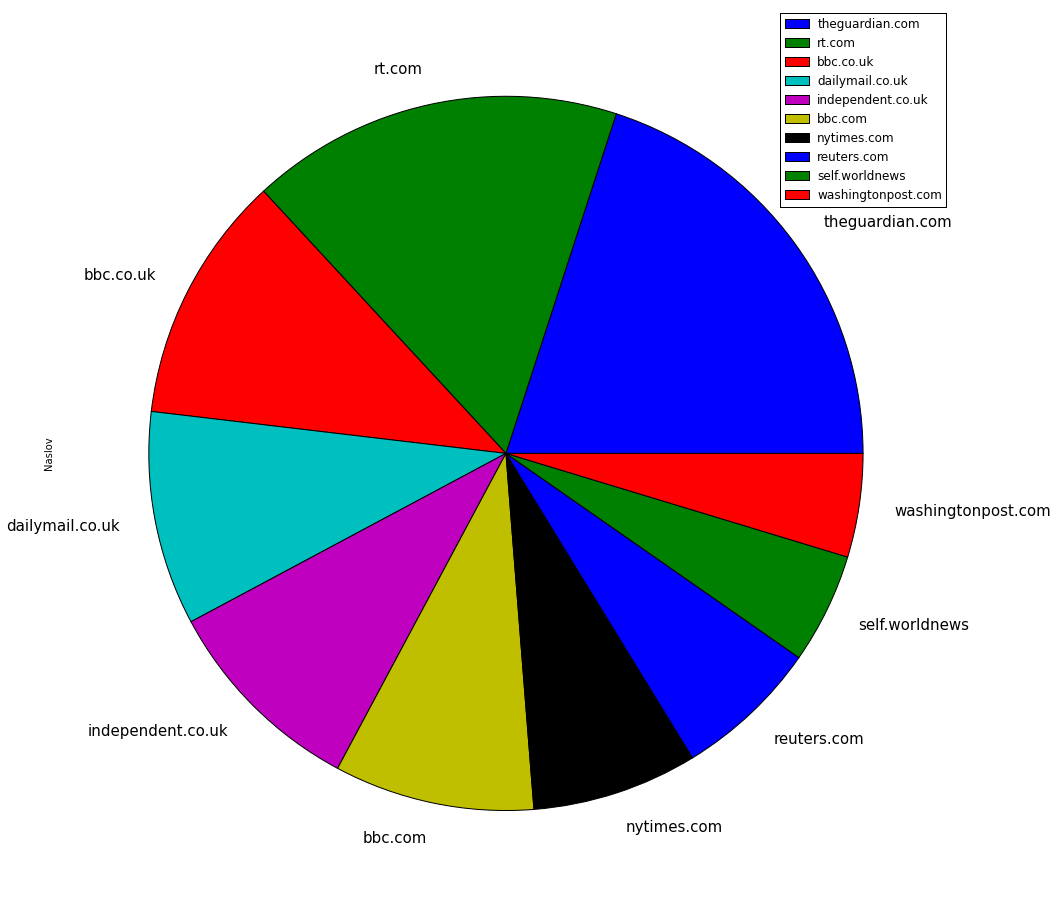

In [35]:
pogosti_wnews.plot(kind='pie',x='id',y='Naslov',figsize =(16,16),fontsize=15)

Komentar: 
(Analiziram samo 10 najpogostejših virov)
V razdelku r/news se pojavi samo 2 neameriška vira (theguardian.com in independent.co.uk).
V razdelku r/worldnews sta tudi samo 2 ameriška vira(nytimes.com, washingtonpost.com) uvrstila med 10 najpogostejših.

Predvidevem lahko, da so bralci in naročniki r/news večinoma prebivalci ZDA, ki jih seveda zanimajo novice povezane z ZDA, bralci r/worldnews pa so ostali obiskovalci Reddita.

Moja hipoteza je potrjena. V r/news je 8 ameriških virov, v r/wnews pa le 2.

###  Hipoteza 2:Viri r/worldnews bodo kvalitetnejše od virov r/news.


S pomočjo prejšnih tabel ugotovimo, da se med najpogostejšimi viri r/news izstopa samo foxnews.com, za katerega bi lahko trdili, da ne poroča najbolj objektivneje.

Med najpogostejšimi viri r/worldnews zasledimo 2, ki bi ju lahko uvrstili med pristranski in rumeni tisk. To sta na drugem mestu po pogostosti ruska spletna stran rt.com in britanski tabloid dailymail.co.uk.

Moja hipoteza ne drži. Viri r/worldnews in r/news so si enakovredni.

### Hipoteza 3 : Novice iz predela kontraverzno bodo iz tabloidov, rumenega tiska ali z zavajujočo vsebino.
Sedaj združim vire novic kontraverzno in najboljše.

In [ ]:
novice_kontraverzno=pd.concat([wnews_con,news_con])
novice_najboljse=pd.concat([wnews_top,news_top])
novice_kontraverzno_viri=pd.concat([wnews_con,news_con]).groupby(by='Vir',as_index=False).count()
novice_najboljse_viri=pd.concat([wnews_top,news_top]).groupby(by='Vir',as_index=False).count()

In [ ]:
naj10_con=novice_kontraverzno_viri[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)
naj10_con

In [ ]:
naj10_top=novice_najboljse_viri[['Vir','Naslov']].sort_values(by='Naslov',ascending=False).head(n=10)
naj10_top

Na vrhu kontraverzno opazimo medij ruske vladne propagande. rt.com (Russia Today) slovi 
kot pristranska (seveda, v korist rusom) in zavajajoča novinarska hiša, znana po širjenju napačnih informacij.
V spodnji tabeli je zapisanih 5 najbolje ocenjenih novic rt.com. Opazimo, da so novice nenaklonjene ZDA (85, 123,433) (ZDA ne marajo Snowdena...) in seveda vzmirjajočo novico za uporabnike spleta (235).

In [ ]:
novice_kontraverzno[novice_kontraverzno['Vir'] =='rt.com'].sort_values('Score', ascending=False).head()

Na drugo mesto po pogostosti virov kontraverznih novic je britanski rumeni tračarski časopis dailymail.co.uk.
Znani konservativni tabloid je znan po nenatančnem, pristranskem in senzacionalnem poročanju. To potrdi tudi seznam 4 najbolje ocenjenih novic. (Ena je bila na strani objavljena dvakrat). 
Novice so povezane s spolnim nasiljem(61), nasiljem (192,307) in krščanstvom(178). 

In [ ]:
novice_kontraverzno[novice_kontraverzno['Vir'] =='dailymail.co.uk'].sort_values('Score', ascending=False).head()

V kategoriji najboljše se med desetimi najpogostejšimi viri ne pojavi vir "vprašljive" kakovosti. 
Za primerjavo kakovosti novice, si poglejmo 5 najbolje ocenjenih novic vira guardian.com.

In [ ]:
novice_najboljse[novice_najboljse['Vir'] =='theguardian.com'].sort_values('Score', ascending=False).head(n=5)

Viri najboljse ne vsebujejo nobenega vira 'vprašljivega' porekla. 

### Zanimivosti

In [ ]:
#tabela vseh novic
vse_novice=pd.concat([news_con,wnews_con,news_top,wnews_top])
#tabela vseh virov
vse_novice_viri=vse_novice.groupby(by='Vir')

In [ ]:
#vse 4 datoteke združene na skupen vir
news_viri=pd.merge(news_con,news_top,on='Vir', suffixes=('_news_con', '_news_top')).groupby(by='Vir', as_index=False).mean()
wnews_viri=pd.merge(wnews_con,wnews_top,on='Vir', suffixes=('_wnews_con', '_wnews_top')).groupby(by='Vir', as_index=False).mean()
vsi_viri=pd.merge(news_viri,wnews_viri,on='Vir').groupby(by='Vir', as_index=False).mean()

#### Kateri vir je najboljši v kateri posamezni kategoriji?

In [ ]:
#najpopularnejsi v r/news kontraverzno
news_con_viri.mean().sort_values(['Score','Komentarji'],ascending=False)[0:1]

In [ ]:
#Kakšne novice ima?
news_con[news_con['Vir']=='fox26houston.com']

In [ ]:
#najpopularnejsi v r/news najboljse 
news_top_viri.mean().sort_values(['Score','Komentarji'],ascending=False)[0:1]

In [ ]:
#Kakšne novice ima?
news_top[news_top['Vir']=='ktul.com']

In [ ]:
#najpopularnejsi v r/wnews kontraverzno
wnews_con_viri.mean().sort_values(['Score','Komentarji'],ascending=False)[0:1]

In [ ]:
#Kakšne novice ima?
wnews_con[wnews_con['Vir']=='techinsider.io']

In [ ]:
#najpopularnejsi v r/wnews najboljse 
wnews_top_viri.mean().sort_values(['Score','Komentarji'],ascending=False)[0:1]

In [ ]:
#Kakšne novice ima?
wnews_top[wnews_top['Vir']=='digitaljournal.com']

Vsak najbolje ocenjen vir (iz posamezne kategorije in nasplošno) ima po eno novico (razen digitaljournal.com, ki ima 2). Pojavitev ene same novice enostavno pojasnii visoko povprečje novice, saj nobena slabše ocenjena novica ne pokvari povprečja kot pri virih z več novicami.

#### Kratek pregled 5 najbolje ocenjenih člankov vsake kategorije

#### Najboljši vir nasploh
Poiščem najbolje ocenjen in komentiran vir v vseh kategorijah. 

In [ ]:
povprecje_kategorij=vsi_viri.mean()
seznam_kategorij=list (povprecje_kategorij.reset_index()['index'])
#relativne ocene in komentarji posameznega vira za vsako kategorijo
for i in seznam_kategorij:
    vsi_viri['{0}'.format(i)] = vsi_viri['{0}'.format(i)]/(vsi_viri.mean()['{0}'.format(i)])

In [ ]:
#Vire razvrstim glede na mediano
vsi_viri['median']=vsi_viri.iloc[:, 1:].median(axis=1)

In [ ]:
naj_viri_5=vsi_viri.sort_values(by='median',ascending=False).head()
naj_viri_5

In [ ]:
naj_viri_5[['Vir','median']]

In [ ]:
naj_viri_5[['Vir','median']].plot(kind='barh',x='Vir', y='median')

#### Kateri vir najbolj odstopa?

In [ ]:
#poglejmo si 5 virov z največjo razliko
vsi_viri[['Vir','rel']].sort_values(by='rel',ascending=False).head()

Oglejmo si podatke vira foxnews.com 

In [ ]:
vsi_viri[vsi_viri['Vir']=='foxnews.com']

In [ ]:
#poglejmo si 5 virov z najmanjšo razliko
vsi_viri[['Vir','rel']].sort_values(by='rel').head()

In [ ]:
vsi_viri[vsi_viri['Vir']=='economist.com']

#### Primerjava povprečnih ocen in komentarjev najpogostejših virov, ki se pojavijo v  kategorijah kontraverzno in najboljše

In [ ]:
#združimo po skupinah najboljše in kontraverzno po virih

kontraverznoV=pd.merge(news_con_viri.mean(),wnews_con_viri.mean(),on='Vir', suffixes=('_wnews_con', '_news_con'))
najboljseV=pd.merge(news_top_viri.mean(),wnews_top_viri.mean(),on='Vir', suffixes=('_wnews_top', '_news_top'))
sez_naj10_con=list (naj10_con['Vir'])
sez_naj10_top=list (naj10_top['Vir'])

In [ ]:
seznam_kategorij2=list (kontraverznoV.mean().reset_index()['index'])

for i in seznam_kategorij2:
    kontraverznoV['{0}'.format(i)] = kontraverznoV['{0}'.format(i)]/(kontraverznoV.mean()['{0}'.format(i)])

Kontraverzno_pogosti=kontraverznoV[(kontraverznoV['Vir']==sez_naj10_con[0])|
              (kontraverznoV['Vir']==sez_naj10_con[1])|
              (kontraverznoV['Vir']==sez_naj10_con[2])|
              (kontraverznoV['Vir']==sez_naj10_con[3])|
              (kontraverznoV['Vir']==sez_naj10_con[4])|
              (kontraverznoV['Vir']==sez_naj10_con[5])|
              (kontraverznoV['Vir']==sez_naj10_con[6])|
              (kontraverznoV['Vir']==sez_naj10_con[7])|
              (kontraverznoV['Vir']==sez_naj10_con[8])|
              (kontraverznoV['Vir']==sez_naj10_con[9])]
Kontraverzno_pogosti

In [ ]:
#primerjava komentarjev
Kontraverzno_pogosti[['Vir','Komentarji_news_con','Komentarji_wnews_con']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

In [ ]:
#primerjava ocen kontraverzno
Kontraverzno_pogosti[['Vir','Score_news_con','Score_wnews_con']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

In [ ]:
seznam_kategorij3 = list (najboljseV.mean().reset_index()['index'])

for i in seznam_kategorij3:
    najboljseV['{0}'.format(i)] = najboljseV['{0}'.format(i)]/(najboljseV.mean()['{0}'.format(i)])

Najboljse_pogosti=najboljseV[(najboljseV['Vir']==sez_naj10_top[0])|
              (najboljseV['Vir']==sez_naj10_top[1])|
              (najboljseV['Vir']==sez_naj10_top[2])|
              (najboljseV['Vir']==sez_naj10_top[3])|
              (najboljseV['Vir']==sez_naj10_top[4])|
              (najboljseV['Vir']==sez_naj10_top[5])|
              (najboljseV['Vir']==sez_naj10_top[6])|
              (najboljseV['Vir']==sez_naj10_top[7])|
              (najboljseV['Vir']==sez_naj10_top[8])|
              (najboljseV['Vir']==sez_naj10_top[9])]
Najboljse_pogosti


In [ ]:
#primerjava komentarjev najboljse
Najboljse_pogosti[['Vir','Komentarji_news_top','Komentarji_wnews_top']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)

In [ ]:
#primerjava ocen najboljse
Najboljse_pogosti[['Vir','Score_news_top','Score_wnews_top']].plot(x='Vir',kind='barh',stacked=False,figsize=(20,20),fontsize=25)